Primeiras linhas do dataset:
    holeid  from    to  Interval   Ag_ppm  Al_pct  As_ppm  Au_ppm  B_ppm  \
0  SPETI01   2.5   5.0       2.5  0.09900  0.8300   1.000  0.0400   5.00   
1  SPETI01   5.0   7.5       2.5  0.08556  0.5612   0.744  0.0400   3.08   
2  SPETI01   7.5  10.0       2.5  0.06392  0.4292   0.472  0.0272   2.00   
3  SPETI01  10.0  12.5       2.5  0.06496  0.6832   0.464  0.0200   2.00   
4  SPETI01  12.5  15.0       2.5  0.04952  0.9992   0.564  0.0200   2.00   

   Ba_ppm  ...   Ti_pct  Tl_ppm  U_ppm  V_ppm  W_ppm  Zn_ppm        mid_x  \
0  70.800  ...  0.15000  0.1300  4.000  23.00  1.300  36.200  696415.8992   
1  53.392  ...  0.09304  0.0724  5.216  12.76  0.724  21.160  696416.7027   
2  41.744  ...  0.06420  0.0400  6.092   7.64  1.296  15.708  696417.5062   
3  64.060  ...  0.11720  0.0912  4.984  16.32  1.032  32.312  696418.3097   
4  96.976  ...  0.17352  0.1520  4.300  26.12  1.688  51.388  696419.1132   

         mid_y       mid_z  COM_ID  
0  8454119.751

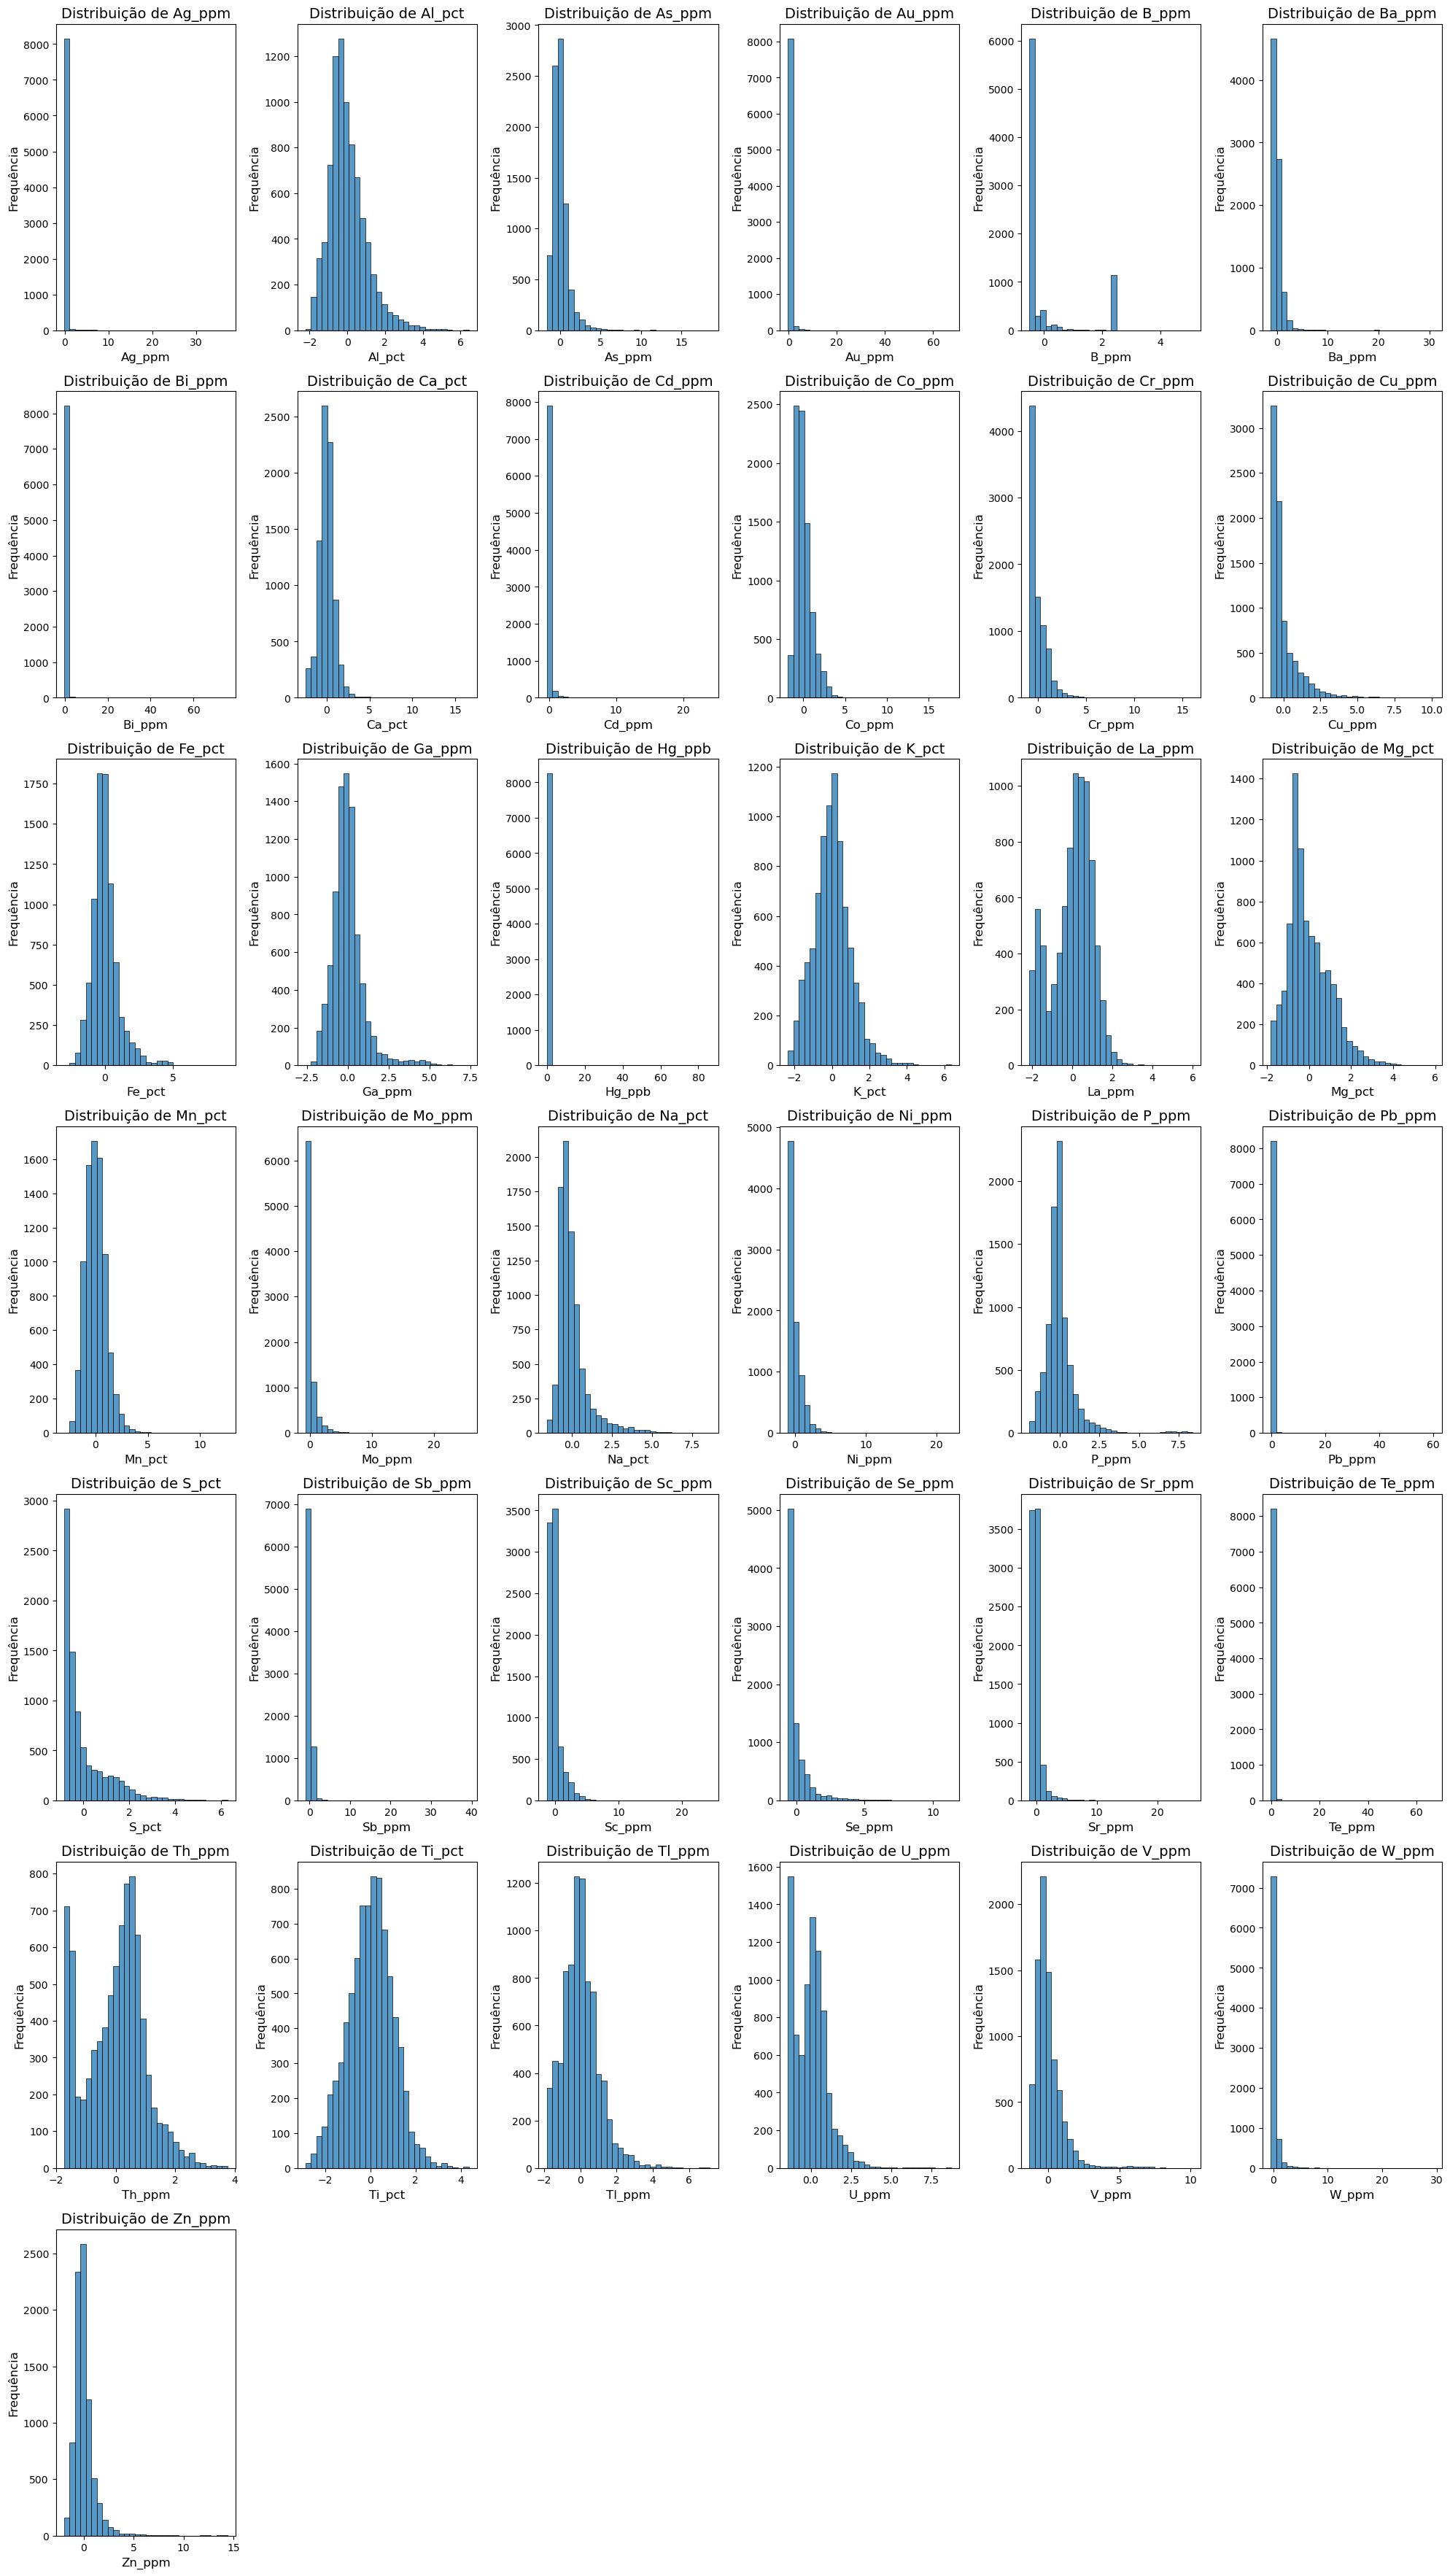


Estatísticas descritivas do dataset normalizado:
             Ag_ppm        Al_pct        As_ppm        Au_ppm         B_ppm  \
count  8.254000e+03  8.254000e+03  8.254000e+03  8.254000e+03  8.254000e+03   
mean   1.825953e-16 -8.439659e-17  1.075251e-16  4.788593e-16 -1.215071e-15   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -1.419738e-01 -2.217388e+00 -1.649828e+00 -2.434869e-01 -5.042797e-01   
25%   -1.136161e-01 -6.464631e-01 -5.665879e-01 -2.320476e-01 -5.042797e-01   
50%   -9.614578e-02 -1.781128e-01 -1.489531e-01 -2.124373e-01 -5.042797e-01   
75%   -5.122924e-02  5.205096e-01  3.469884e-01 -1.170777e-01 -2.278698e-01   
max    3.716813e+01  6.430855e+00  1.851411e+01  6.746848e+01  5.116054e+00   

             Ba_ppm        Bi_ppm        Ca_pct        Cd_ppm        Co_ppm  \
count  8.254000e+03  8.254000e+03  8.254000e+03  8.254000e+03  8.254000e+03   
mean   4.851677e-17  5.567929e-17  3.530816e-17  2.495665e-16 -9.278984e-17   
s

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

# Carregar o dataset
file_path = r"D:\python\hochschild\COMPOSITE_2_5_Iso.csv"
df = pd.read_csv(file_path)

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)
# Exibir as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(df.head())

# Converter as variáveis para string
df['holeid'] = df['holeid'].astype(str)
df['N_Muestra'] = df['N_Muestra'].astype(str)
df['COM_ID'] = df['COM_ID'].astype(str)

# Verificar dados faltantes
print("Dados Faltantes:")
print(df.isnull().sum())

# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Verificar se a coluna 'Interval' existe
if 'Interval' in df.columns:
    # Filtrar as linhas com o atributo interval igual a 2.5
    filtered_df = df[df['Interval'] == 2.5]
else:
    print("A coluna 'Interval' não existe no DataFrame.")
    filtered_df = df


# Confirmar que não há mais dados faltantes
print("\nApós tratamento, dados faltantes:")
print(filtered_df.isnull().sum())

# Excluir colunas específicas antes de normalizar
cols_to_exclude = ['holeid', 'N_Muestra', 'COM_ID','mid_x', 'from', 'to', 'mid_y', 'mid_z', 'Interval']
cols_to_normalize = filtered_df.drop(columns=cols_to_exclude)

# Normalizar os dados
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cols_to_normalize.select_dtypes(include=[np.number]))

# Criar um DataFrame com os dados normalizados
normalized_df = pd.DataFrame(scaled_df, columns=cols_to_normalize.select_dtypes(include=[np.number]).columns)

# Adicionar de volta as colunas que não foram normalizadas
for col in ['holeid', 'N_Muestra', 'COM_ID','mid_x', 'from', 'to', 'mid_y', 'mid_z', 'Interval']:
    normalized_df[col] = filtered_df[col].values

# Informações gerais sobre o dataset normalizado
print("\nInformações gerais do dataset normalizado:")
print(normalized_df.info())

# Estatísticas descritivas do dataset normalizado
print("\nEstatísticas descritivas do dataset normalizado:")
print(normalized_df.describe())

# Distribuição das variáveis numéricas
print("\nDistribuição das variáveis numéricas:")

# Número de colunas para os subplots
num_cols = 6
num_vars = len(normalized_df.columns)
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Filtrar as colunas a serem plotadas
cols_to_plot = [col for col in normalized_df.columns if col not in cols_to_exclude]

for i, var in enumerate(cols_to_plot):
    sns.histplot(normalized_df[var], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Salvar o gráfico como figura no mesmo diretório do dataset
output_dir = os.path.dirname(file_path)
output_file = os.path.join(output_dir, 'distribuicao_variaveis_numericas_samples.png')
plt.savefig(output_file)

# Mostrar o gráfico
plt.show()

# Salvar o novo dataset normalizado no mesmo diretório do dataset original
new_file_path = os.path.join(output_dir, 'COMPOSITE_2_5_normalizado_Iso_samples.csv')
normalized_df.to_csv(new_file_path, index=False)

# Carregar o novo dataset normalizado
normalized_df = pd.read_csv(new_file_path)

# Estatísticas descritivas do dataset normalizado
print("\nEstatísticas descritivas do dataset normalizado:")
print(normalized_df.describe())


